In [1]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
# import io
# df2 = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))

In [6]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# drop unwanted and split data into dependent and independent variables - 
x = df.iloc[:,3:-1]
y = df.iloc[:,-1]

In [8]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [11]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [12]:
# encoding categorical data -
# one hot encoding - 
x = pd.get_dummies(x,columns=['Geography','Gender'])
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [14]:
x = x.drop(['Geography_France','Gender_Female'],axis = 1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [15]:
# feature scaling - 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_stand = sc.fit_transform(x)
x_stand

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ..., -0.57873591,
         1.74273971, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57873591,
        -0.57380915, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  1.72790383,
        -0.57380915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57873591,
        -0.57380915, -1.09598752]])

In [17]:
# split data into train and test -
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_stand,y,test_size=0.2,random_state=101)

In [33]:
# Building deep neural network - MLP
from tensorflow import keras

In [34]:
# Sequential API - 
dnn = tf.keras.models.Sequential()
# Adding layers-
dnn.add(tf.keras.layers.Dense(units=6,activation='relu'))
dnn.add(tf.keras.layers.Dense(units=6,activation='relu'))
dnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid')) # binary class classification 
# use activation = softmax for multi class classification

In [35]:
# train model - 
dnn.compile(optimizer ='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [36]:
# fit model - 
history = dnn.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.7810 - accuracy: 0.5188 - val_loss: 0.5423 - val_accuracy: 0.7890
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4884 - accuracy: 0.7980 - val_loss: 0.4619 - val_accuracy: 0.7930
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4402 - accuracy: 0.8117 - val_loss: 0.4253 - val_accuracy: 0.8135
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4154 - accuracy: 0.8215 - val_loss: 0.4033 - val_accuracy: 0.8165
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3993 - accuracy: 0.8310 - val_loss: 0.3870 - val_accuracy: 0.8325
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3872 - accuracy: 0.8395 - val_loss: 0.3742 - val_accuracy: 0.8420
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3777 - accuracy: 0.8474 - val_loss: 0.3641 - val_accuracy: 0.8430

In [37]:
# other way to check test accuracy (separately) - 
y_pred = dnn.predict(x_test)

63/63 [==============================] - 0s 1ms/step


In [38]:
y_pred = (y_pred > 0.5)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8705

In [ ]:
# ploting train & test - 

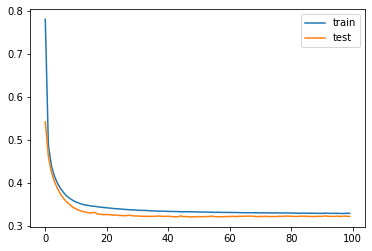

In [40]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()